#  <font color='#eb3483'> Analysing Text </font> 
Text data is going to pop up again and again in your analysis (you're reading textual data right now!). In this module we're going to explore some handy functions for working with strings in python.

Instead of just listing through all the functions available, we're going to learn the functions through a sample dataset to evaluate hate speech.

<div>
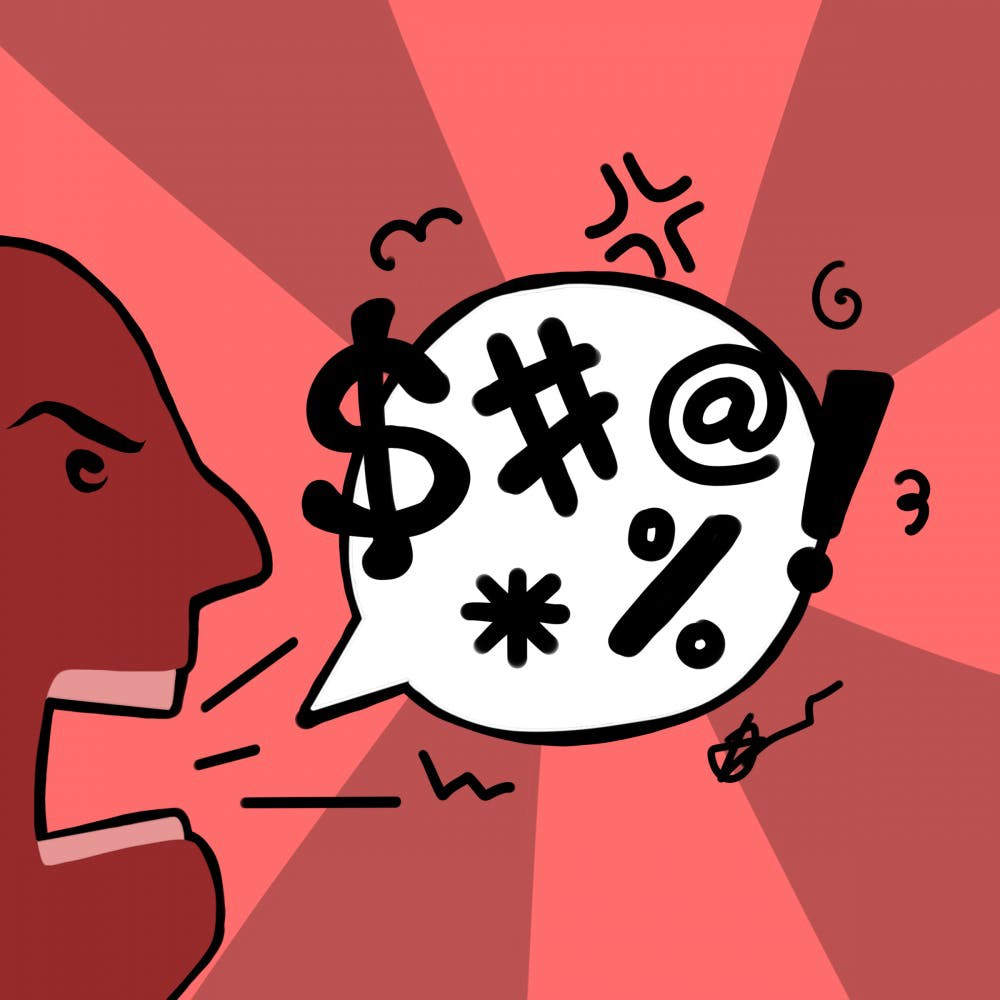
</div>

###   <font color='#eb3483'>  Problem Statement </font>

Just like any data anlytics project, understanding the problem statement is the first (and most important!) step. This would help you give an intuition of what you will face ahead of time. Let us see the problem statement -

*The objective of this task is to understand differences in words used in hate speach vs non hate speach tweets.*

(For those interested in machine learning, this notebook can easily be extended to a machine learning project (the data is actually taken from a data science hackathon from Analytics Vidhya!).

##  <font color='#eb3483'>  0. Loading Libraries and Data </font>

In [ ]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string # for dealing with strings
import nltk # for text manipulation
import warnings 
import gensim
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Let's read in our dataset.

In [ ]:
tweets  = pd.read_csv('data/train_E6oV3lV.csv')

In [ ]:
tweets.head()

Note that text data is quite different than what we've seen so far. Why might it be a problem for analytics?

## <font color='#eb3483'>  1. Text Pre-processing and Cleaning  </font>

####  <font color='#eb3483'>  Data Inspection </font>

Let's check out a few non hate speech tweets.

In [ ]:
tweets[tweets['label'] == 0].head(10) # non hate labels == 0

<br>
Now check out a few hate speech tweets.

In [ ]:
tweets[tweets['label'] == 1].head(10) #hate labels = 1


Let's check dimensions of the dataset.

In [ ]:
tweets.shape

Let's have a glimpse at label-distribution in our dataset.

In [ ]:
#What fraction of our tweets are hate speech? 


In our dataset, we have ? (~ ?%) tweets labeled as racist or sexist, and ? (~ ?%) tweets labeled as non racist/sexist.


###   <font color='#eb3483'> Data Cleaning </font>

Our goal during data cleaning is to get our data ready to go into our analysis. A non-exhaustive list of steps we might want to do are:

1. Tokenization: breaking text strings (tweets, reviews, emails, books)  into a list of individual words
2. Case transformation: converting all words to lower case (e.g. Once vs once)
3. Filtering out non-alphabetical tokens - depends on task at hand (e.g. #covid, @twitteruser, 12 dogs)
4. Stopwords removal (a, the, but, in)
5. Word normalization : Lemmatization (reducing words with same meaning to same term) or Stemming (getting the stem root of the word)

Let's start with 3 filtering out non-alphabetical tokens.

What are some things we might want to fix?

For this section, we'll be using a pattern matching language called regex (or regular expressions). It's a super handy way of defining patterns to search for in text. Here's a <a href='https://cheatography.com/davechild/cheat-sheets/regular-expressions/'> cheat sheet </a> of some terms, and a <a href='https://regex101.com/'> website </a>to test your regex. Don't worry though, you'll pick up the important bits as we go through the notebook.

### <font color='#eb3483'> 1. Removing Twitter Handles (@user) </font>

In [ ]:
tweets['tidy_tweet'] = tweets['tweet'].str.replace("@[\w]*", " ") #str.replace from string library
# this is a regex expression that says remove any word that starts with @

tweets.head()

#these were all replaced with "user" in the dataset anyway for privacy reasons.

In [ ]:
# let's try removing all #tags (remember to work from and save to the tidy_tweet column)



###  <font color='#eb3483'> 2. Removing Punctuations, Numbers, and Special Characters </font>

In [ ]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].str.replace("[^a-zA-Z]", " ") #str.replace from string library
#replace any charachter that does not start with (^) a small letter or big letter (removes numbers, emoji text etc. 
# also the # from hashtags)
tweets.head(10)

### <font color='#eb3483'> 3. Removing stop Words </font>
Stop words are common words that don't give us context on the content of natural language. For example, consider the sentence "The dog is at the park". Really the only words that give us context (or distinguish this from other sentences) are dog and park.

To see this in action let's look at the most common words in our dataset.

In [ ]:
freq = pd.Series(' '.join(tweets['tidy_tweet']).split()).value_counts()[:10]
freq.plot.barh()

Yikes none of those words are going to help us distinguish hate speech. Luckily nltk (the primo nlp toolbox) can help us filter some stuff out.

In [ ]:
#We can pull a list of english stopwords from nltk
from nltk.corpus import stopwords
stop = nltk.download('stopwords')
stop = stopwords.words('english')

In [ ]:
stop[:20] #example of what stop words are

In [ ]:
# remove words that are in stop words dictionary
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop)) 

In [ ]:
tweets.head()

We see there are still a few "short words" usually text slang in there - lets remove words < 3 (heart you too) characters long.

### <font color='#eb3483'> 4. Removing Short Words </font>

In [ ]:
tweets['tidy_tweet'] = tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
tweets.head()

Lets check out the most commonly used words

In [ ]:
freq = pd.Series(' '.join(tweets['tidy_tweet']).split()).value_counts()[:10]
freq

Lets check and some infrequently used words

In [ ]:
freq = pd.Series(' '.join(tweets['tidy_tweet']).split()).value_counts()[-10:]
freq

# any thoughts on this?

### <font color='#eb3483'> 5. Text Normalization </font>
Text normalization is the process of getting different conjugations/tenses of the same word to be the same token. Some examples:

<div>
<img src="media/text_norm.png" width="800"/>
</div>

In general there's two big strategies: Stemming (looks at 'stem' of words) or Lemmatization (looks at tenses and compares).

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split()) # tokenizing #there are more than one ways to skin this cat!

In [ ]:
tokenized_tweet.head()

Now we can normalize the tokenized tweets.

In [ ]:
#!pip install nltk

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 


In [ ]:
tokenized_tweet[:5]

In [ ]:
# what other method could I use here?

Now let’s stitch these tokens back together

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
tweets['tidy_tweet'] = tokenized_tweet

In [ ]:
tweets.head()

<hr>

## <font color='#eb3483'> Story Generation and Visualization from Tweets </font>

There's a lot of cool visualizations we can do with text data - I'm a big fan of a word cloud! Let's check out how to do it with the word cloud package.

 <font color='#eb3483'> __A) Understanding the common words used in the tweets: WordCloud__ </font>

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize our non hate speech  words using the wordcloud plot.

In [ ]:
!pip install WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
#let's join alllll the none hate speech words into one vector 
normal_words =' '.join([text for text in tweets['tidy_tweet'][tweets['label'] == 0]])
normal_words

In [ ]:
#Visit https://www.python-graph-gallery.com/wordcloud/ and see if you can translate how to 
# plot your a word cloud on our own data. 
# post it on slack sharing_is_caring


#checkout the help function if you want to change some arguments


## Let's check out the most commonly used words using Seaborn

In [ ]:
# get the top 10 value counts 
freq_normal = pd.Series(normal_words.split()).value_counts()[:10]
freq_normal

In [ ]:
#turn it into a dataframe
tweets_count = pd.DataFrame(freq_normal).reset_index()
tweets_count.columns = ['word', 'freq']



In [ ]:
#Plot a barplot in seaborn
plt.figure(figsize=(14,9))

#...

Another cool thing we can do is look at the sentiment (i.e. how positive/negative) a word is. Luckily TextBlob has some awesme functionality to do this for us (checkout some details on how they do it [here](https://planspace.org/20150607-textblob_sentiment/)). 

In [ ]:
#We can also get an average sentiment score for the non hate speech 
#tweets using sentiment analysis from TextBlob

#Here, we only extract polarity as it indicates the sentiment as value nearer to 
#1 means a positive sentiment 
#and values nearer to -1 means a negative sentiment. 

!pip install TextBlob
from textblob import TextBlob



In [ ]:
cleaned_non_hs_tweets = tweets[tweets.label == 0]

sentiment_nhs = cleaned_non_hs_tweets['tidy_tweet'].apply(lambda x: TextBlob(x).sentiment[0]).mean()
sentiment_nhs

Similarly, we can analyse the hate speech tweets.
Expect to see negative, racist, and sexist terms.

## <font color='#eb3483'> Hate speech Tweets </font>

In [ ]:
#Create a word Cloud for hate speech tweets

In [ ]:
# create a bar graph of the most used words


In [ ]:
# try some sentiment analysis on the hate speech 


This was just a quick run to show you whats possible. Working with text is a blossoming and exciting field.

### <font color='#eb3483'> Just for funsies ...  </font>

#### <font color='#eb3483'> 1. Word2Vec Embeddings  </font>
Think of word2vec as a way of representing each word with a vector such that similar words have similar vectors (i.e. their distance is small). It's some fancy stuff - you can read more about it [here](http://jalammar.github.io/illustrated-word2vec/).

<div>
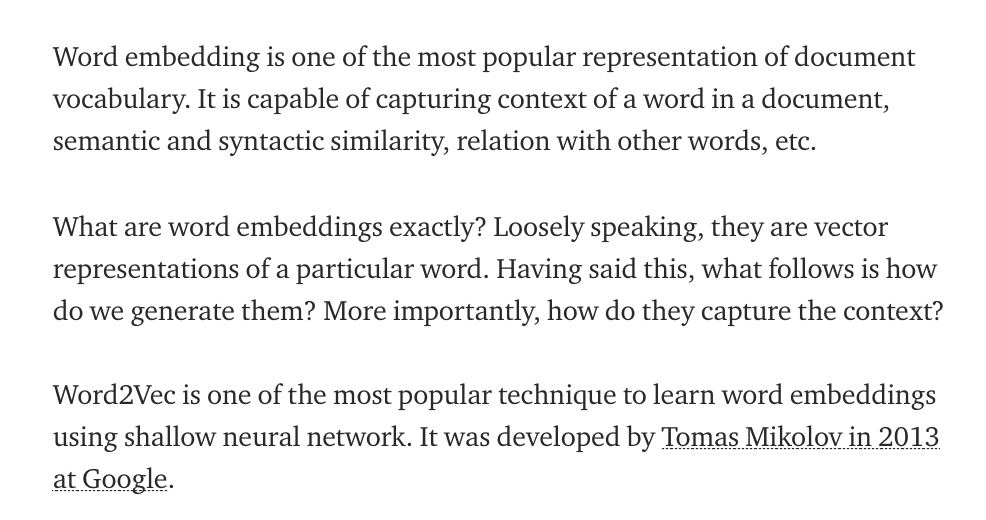
</div>

In [ ]:
#lets create a quick word 2 vec model for fun
#takes quite a few seconds - Let's do todays mindful minute while we wait. 

tokenized_tweet = tweets['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(tweets['tidy_tweet']), epochs=10)

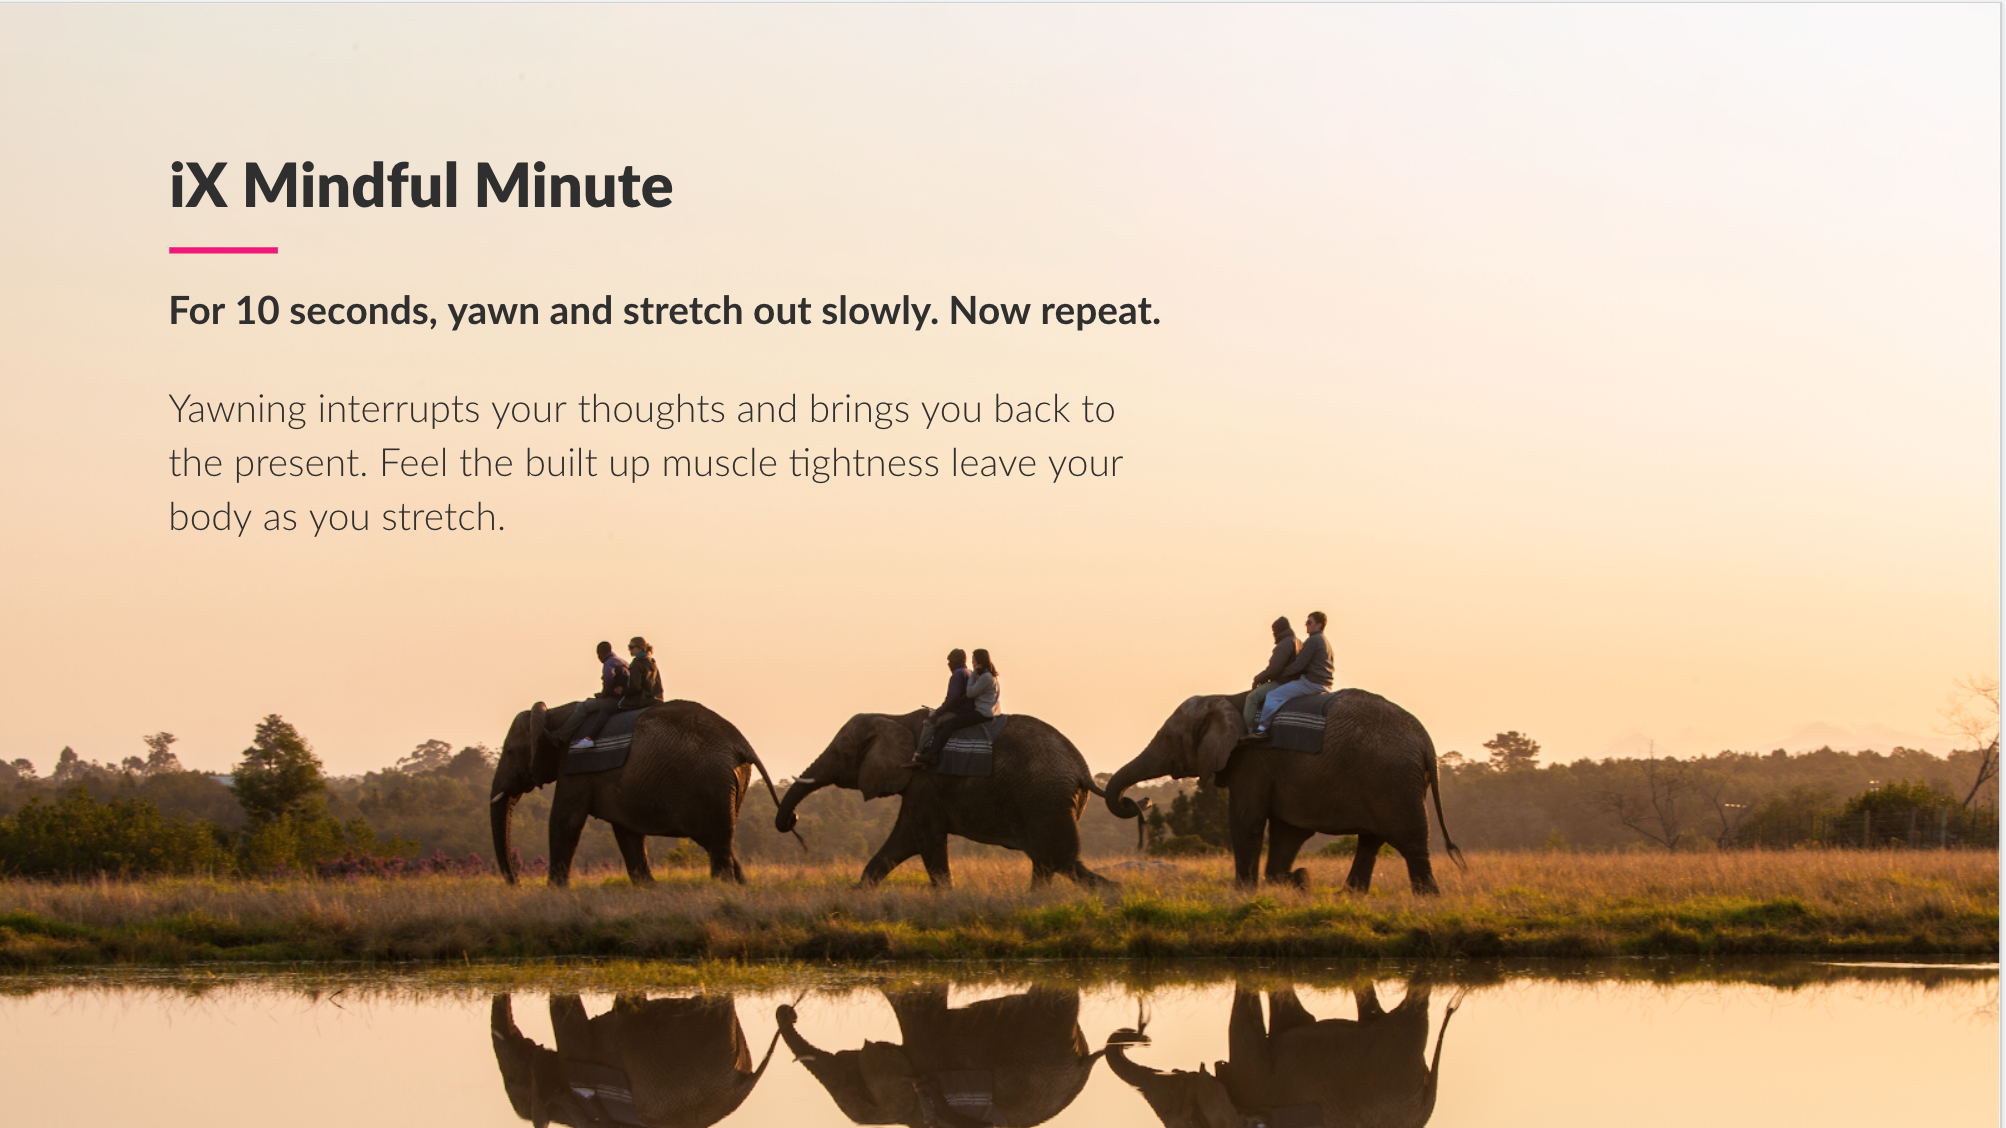

Let's play a bit with our Word2Vec model and see how it performs. We will specify a word and the model will pull out the most similar words from the corpus.

In [ ]:
model_w2v.wv.most_similar(positive="love")

In [ ]:
model_w2v.wv.most_similar(positive="trump")

<hr>

# <font color='#eb3483'> A note on accessing twitter data for your own interest </font>


Twitter in recent months has tightened up on accessing twitter data (fair enough).
In order to be able to access data (even the more limited streaming API version

If you want to set up your own account to be able to access twitter data you need to go through these pretty steps here  

http://social-metrics.org/api-keys/
or this great article here
https://medium.com/@jaimezornoza/downloading-data-from-twitter-using-the-streaming-api-3ac6766ba96c


I pulled a few fun and small twitter data sets for you to play around with if you have any interest in some after class practice
1) #covid 2) @TrevorNoah 3) @realDonaldTrump

[Here](https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-4-count-vectorizer-b3f4944e51b5) is a great 4 part tutorial that goes in depth through some text processing and analysis for some more practice and understanding